In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
df=pd.read_csv("RidingMowers.csv")
df

,Income,Lot_Size,Response,Unnamed: 3,Ecludian Distance
0,34,26,Not Bought,NaN,82.292162
1,34,40,Not Bought,NaN,69.971423
2,34,46,Not Bought,NaN,64.899923
3,34,48,Not Bought,NaN,63.245553
4,34,53,Not Bought,NaN,59.203040
...,...,...,...,...,...
175,86,121,Bought,NaN,26.400758
176,87,109,Bought,NaN,19.235384
177,88,119,Bought,NaN,26.172505
178,89,110,Bought,NaN,21.470911


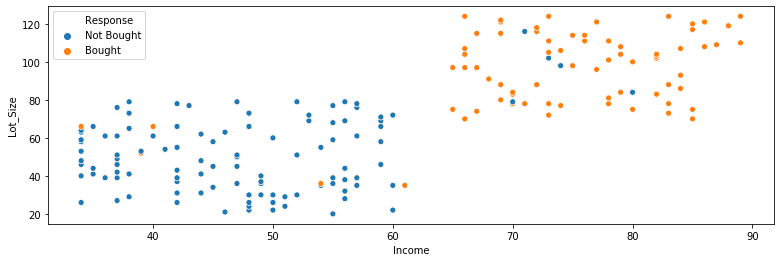

In [6]:
plt.figure(figsize=(13,4))
sns.scatterplot(x='Income',y='Lot_Size',data=df,hue='Response')


In [34]:
y=df['Response']
X=df[['Income','Lot_Size']]

In [35]:
from  sklearn import datasets
from sklearn import linear_model
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)#target 80-20

In [36]:
#feature scaling 
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

In [37]:
#Create KNN classifier K=5 assumption
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)
print("Test score:{:.6f}".format(np.mean(y_pred==y_test)))

Test score:0.981481


In [38]:
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(y_test,y_pred)
print(confusion_matrix)

[[24  1]
 [ 0 29]]


In [39]:
a=18+1+0+17
b=(18+17)
print(b/a)

0.9722222222222222


In [40]:
error=[]
#calculating error for k values between 1 and 40
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i=knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))

In [41]:
error

[0.09259259259259259,
 0.09259259259259259,
 0.037037037037037035,
 0.018518518518518517,
 0.018518518518518517,
 0.018518518518518517,
 0.018518518518518517,
 0.018518518518518517,
 0.018518518518518517,
 0.018518518518518517,
 0.037037037037037035,
 0.018518518518518517,
 0.018518518518518517,
 0.018518518518518517,
 0.018518518518518517,
 0.018518518518518517,
 0.018518518518518517,
 0.018518518518518517,
 0.018518518518518517,
 0.018518518518518517,
 0.018518518518518517,
 0.018518518518518517,
 0.018518518518518517,
 0.018518518518518517,
 0.018518518518518517,
 0.018518518518518517,
 0.018518518518518517,
 0.018518518518518517,
 0.018518518518518517,
 0.018518518518518517,
 0.018518518518518517,
 0.018518518518518517,
 0.018518518518518517,
 0.018518518518518517,
 0.018518518518518517,
 0.018518518518518517,
 0.018518518518518517,
 0.018518518518518517,
 0.037037037037037035]

Text(0, 0.5, 'Mean Error')

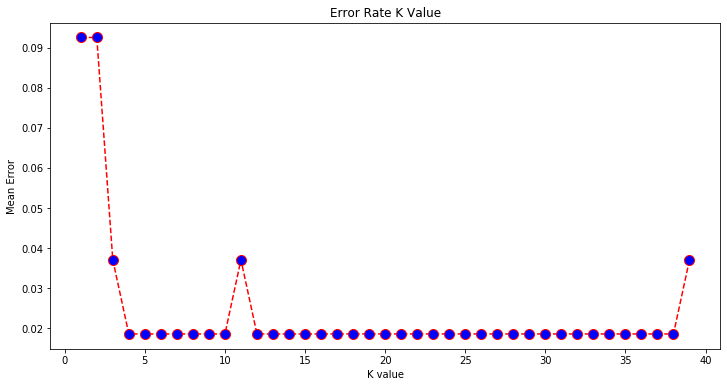

In [42]:
#The next step is to plot the error vallues against k values
plt.figure(figsize=(12,6))
plt.plot(range(1,40),error,color='red',linestyle='dashed',marker='o',markerfacecolor='blue',markersize=10)
plt.title("Error Rate K Value")
plt.xlabel("K value")
plt.ylabel('Mean Error')